# Topic 4 Assignemnt
For this assignment, there is only one question. You are responsible for completing all of the steps that you believe are required to fully answer that question based on the notes for Topic 4. You must provide insights throughout the analysis as well as a conclusion.

***This is a very DIFFICULT assignment. Please work through it the best that you can and try to think through the required steps, particularly during the second half.***

***Assignments should be uploaded in two formats to D2L. The first format is the .ipynb file that contains your code. The second format is an html file that you can obtain by File > Download As > HTML (.html).***

## Question 1

**Data Description:**
You will be responsible for downloading the data you need from Yahoo Finance.

**Context:**
You have just joined a portfolio management team here at MTSU Investment Advisors. As your first task, the team manager has asked you to complete the following project and report back. You must create a portfolio, determine the optimal weights for the portfolio by iterating through random weighting options, plot the efficient frontier, and use various portfolio performance metrics to determine if the portfolio is suitable for investment.

**Objective:**
- Select 3 securities to include in the portfolio and include at least 3 years of data.
- Obtain price data from Yahoo Finance and be sure to also obtain data for SPY to use as your market.
- Calculate portfolio returns and risk.
- Calcualte the portfolio risk if you invested in all 3 securities (not just 2 of the 3).
- Selecting just 2 of your 3 securities, create random portfolio weights and complete the remaining steps. You must invest at lest 85% of your portfolio in one of the securities. You can do this by using `import random` and then `random.uniform(lower bound, upper bound)` to ensure your random weight falls between the values of 85% and 100%.
- Identify the optimal portfolio
- Plot the Efficient Frontier - how does the requirement of 85% invested in one stock impact the efficient frontier?
- Make a second efficient frontier that does not have this same requirement - does this plot look more as your expected?
- Examine at least 3 different portfolio performance metrics - assume a risk free rate of 1%. You must compare the performance of your portfolio to the performance of the market as a benchmark.
- Determine if the portfolio is worth investing in relative to the alternative of investing in the market portfolio.

### Answer to Question 1

#### Hint 1: Import Libraries

In [ ]:
# Required libraries

import pandas as pd
import math
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#### Hint 2: Obtain stock returns for 3 stocks + SPY using yfinance

In [ ]:
# Define the ticker list
tickers_list = ['AAPL', 'GOOG', 'MSFT', 'SPY']

# Download the data for the above tickers and extract the Adj Close column
stock_prices = yf.download(tickers_list, start='2018-01-01', end='2023-12-31')['Adj Close']

# Set the index to a datetime object
stock_prices.index = pd.to_datetime(stock_prices.index)

# Display the first 5 rows
stock_prices.head()


[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,GOOG,MSFT,SPY
Date,,,,
2018-01-02,40.722874,53.250000,80.229004,243.072266
2018-01-03,40.715782,54.124001,80.602394,244.609772
2018-01-04,40.904900,54.320000,81.311783,245.640747
2018-01-05,41.370621,55.111500,82.319901,247.277695
2018-01-08,41.216965,55.347000,82.403923,247.729889


In [ ]:
# Calculate the daily returns
price_return = stock_prices.pct_change()

# Drop the rows with NaN values
price_return.dropna(inplace=True)

price_return

Ticker,AAPL,GOOG,MSFT,SPY
Date,,,,
2018-01-03,-0.000174,0.016413,0.004654,0.006325
2018-01-04,0.004645,0.003621,0.008801,0.004215
2018-01-05,0.011385,0.014571,0.012398,0.006664
2018-01-08,-0.003714,0.004273,0.001021,0.001829
2018-01-09,-0.000115,-0.000614,-0.000679,0.002263
...,...,...,...,...
2023-12-22,-0.005547,0.006488,0.002784,0.002010
2023-12-26,-0.002841,0.000701,0.000214,0.004223
2023-12-27,0.000518,-0.009663,-0.001575,0.001808


In [ ]:
# Simple annualized returns
annual_return = price_return.mean()*252

annual_return

Ticker
AAPL    0.309906
GOOG    0.211479
MSFT    0.303639
SPY     0.132968
dtype: float64

In [ ]:
# Simple annualize standard deviation
annual_sd = price_return.std()*math.sqrt(252)

annual_sd

Ticker
AAPL    0.316770
GOOG    0.312258
MSFT    0.301239
SPY     0.203887
dtype: float64

#### Hint 3: Calculate portfolio returns and risk assuming a simple split of 33%, 33%, and 34% invested in each stock.
You will need the covariance between each pair of securities in this part (ie. AMZN/DIS, AMZN/WMT, and DIS/WMT). This will extend out the formula for the portfolio standard deviation. Try to think through how this will change your formula from 2 stocks as we examined in the notes. Remember that you will need to extent the formula by including the weights of each security/pair and the covariance between that pair on the end of the formula. This will be the biggest challenge of this assignment. There are more efficient ways to do this calculate, but those are better saved for a portfolio theory course. For now, just calculate 3 separate covariance variables for each of the 3 pairs of securities.

In [ ]:
# Weights of each stock
wx = .33
wy = .33
wz = .34

# Covariance of x and y, x and z, y and z
cov_x_y = np.cov(price_return['AAPL'], price_return['GOOG'])*252
cov_x_z = np.cov(price_return['AAPL'], price_return['MSFT'])*252
cov_y_z = np.cov(price_return['GOOG'], price_return['MSFT'])*252

# Portfolio return
port_return = wx*annual_return['AAPL'] + wy*annual_return['GOOG'] + wz*annual_return['MSFT']

# Portfolio risk
portfolio_std_dev = math.sqrt((wx**2)*(annual_sd['AAPL']**2) +
                              (wy**2)*(annual_sd['GOOG']**2) +
                              (wz**2)*(annual_sd['MSFT']**2) +
                              2*wx*wy*wz*cov_x_y[0, 1]*cov_x_z[0,1]*cov_y_z[0,1])

print("The covariance of AAPL and GOOG: ", round(cov_x_y[0, 1], 4))
print("The covariance of AAPL and MSFT: ", round(cov_x_z[0, 1], 4))
print("The covariance of GOOG and MSFT: ", round(cov_y_z[0, 1], 4))
print(f'The portfolio return: {str(round(port_return*100, 2))}%.')
print(f"The portfolio standard deviation: {str(round(portfolio_std_dev*100, 2))}%.")

The covariance of AAPL and GOOG:  0.0667
The covariance of AAPL and MSFT:  0.0716
The covariance of GOOG and MSFT:  0.0719
The portfolio return: 27.53%.
The portfolio standard deviation: 17.91%.


#### Hint 3: Select just 2 of your 3 securities now. Calculate portfolio risk of your 2 stock portfolio. Change the stock weights by creating 500 random portfolios. Be sure invest at least 85% of your portfolio into one of the two stocks.

In [ ]:
portfolio = pd.DataFrame()

# Number of portfolios
n = 500

# Calculate risk and returns for n random weight sets
for i in range(n):
    wy = np.random.random(1)[0]
    wz = 1-wy
    portfolio.loc[i, 'goog_weight'] = wy
    portfolio.loc[i, 'msft_weight'] = wz

    portfolio.loc[i, 'returns'] = wy * annual_return['GOOG'] + wz*annual_return['MSFT']
    portfolio.loc[i, 'std_dev'] = math.sqrt((wy**2)*(annual_sd['GOOG']**2) + (wz**2)*(annual_sd['MSFT']**2) + 2*wy*wz*cov_y_z[0, 1])
    portfolio.loc[i, 'returns per std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

# Max reward to risk weights
max_ret_by_std_dev = portfolio.iloc[portfolio['returns per std_dev'].idxmax()]
print('\nMax Ratio')
print(max_ret_by_std_dev)

# Max return weights
max_ret = portfolio.iloc[portfolio['returns'].idxmax()]
print('\nMax Return')
print(max_ret)

# Minimum risk weights
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
print('\nMin Risk')
print(min_std_dev)


Max Ratio
goog_weight            0.005714
msft_weight            0.994286
returns                0.303112
std_dev                0.300883
returns per std_dev    1.007410
Name: 107, dtype: float64

Max Return
goog_weight            0.005714
msft_weight            0.994286
returns                0.303112
std_dev                0.300883
returns per std_dev    1.007410
Name: 107, dtype: float64

Min Risk
goog_weight            0.424560
msft_weight            0.575440
returns                0.264512
std_dev                0.287639
returns per std_dev    0.919594
Name: 402, dtype: float64


#### Hint 4: Identify the optimal portfolio, plot all of the portfolios, and identify on the plot the optimal portfolio

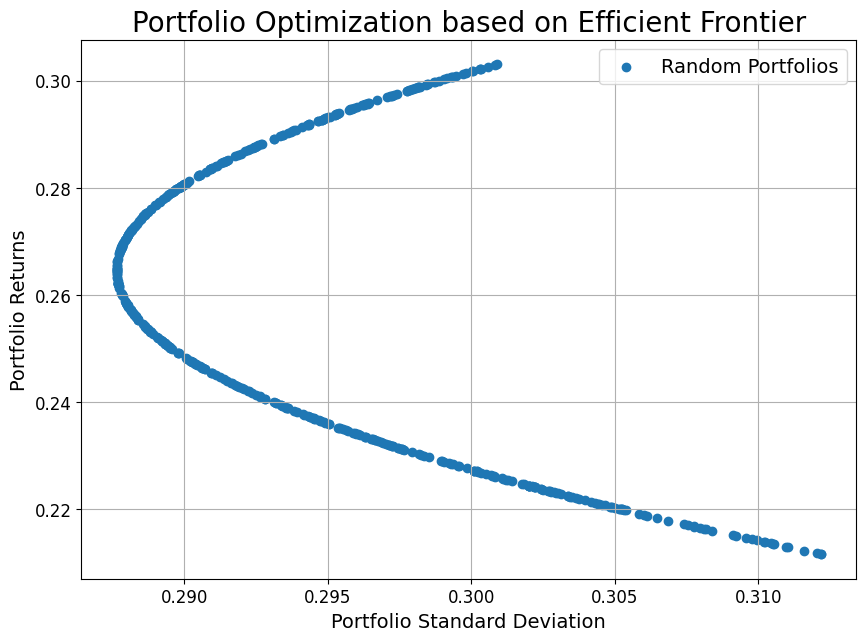

In [ ]:
# Plot the portfolios
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.legend(loc='best', fontsize=14)
plt.show()

In [ ]:
max_ret_by_std_dev

goog_weight            0.005714
msft_weight            0.994286
returns                0.303112
std_dev                0.300883
returns per std_dev    1.007410
Name: 107, dtype: float64

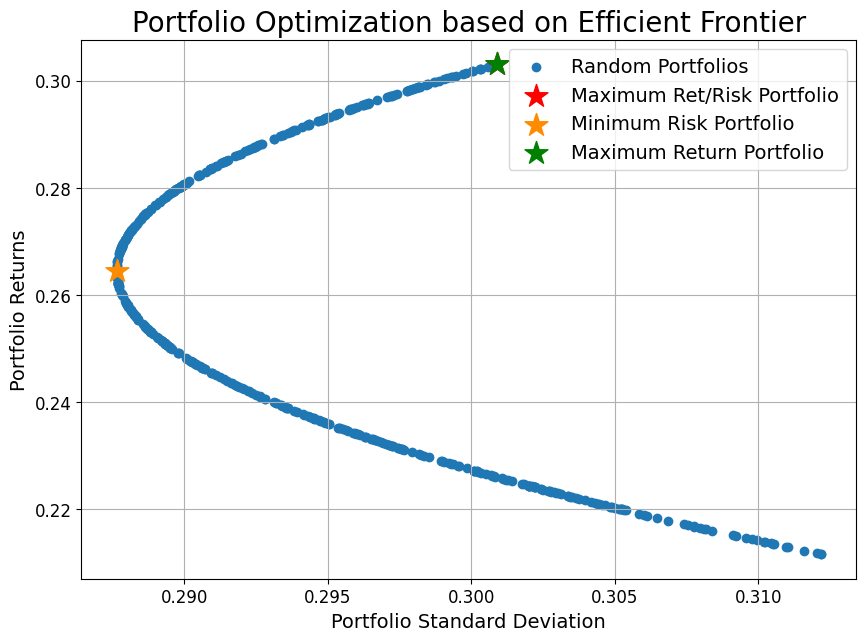

In [ ]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')

plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=300, color='r', label='Maximum Ret/Risk Portfolio')

plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=300, color='darkorange', label='Minimum Risk Portfolio')

plt.scatter(max_ret.std_dev, max_ret.returns,
            marker='*', s=300, color='green', label='Maximum Return Portfolio')

plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

#### Hint 5: Redo the efficient frontier with no weight restrictions

In [ ]:
# Use iloc on the row to obtain the optimal weights
optimal_weights = max_ret_by_std_dev[["goog_weight", "msft_weight"]]

# Print the optimal weights of MSFT and goog
print("The optimal weight of GOOG is: ", str(round(optimal_weights[0]*100, 2))+"%")

print("The optimal weight of MSFT is: ", str(round(optimal_weights[1]*100, 2))+"%")

The optimal weight of GOOG is:  0.57%
The optimal weight of MSFT is:  99.43%


#### Hint 6: Select 3 portfolio performance measures of your choice and evaluate the performance of the optimal portfolio. This will require you to take the original stock return file and add the optimal weights we just calculated to it. With the daily returns and the portfolio weights, we can calculate the daily portfolio returns.

In [24]:
stock_prices.head()

Ticker,GOOG,MSFT,SPY
Date,,,
2018-01-02,53.250000,80.229004,243.072266
2018-01-03,54.124001,80.602394,244.609772
2018-01-04,54.320000,81.311783,245.640747
2018-01-05,55.111500,82.319901,247.277695
2018-01-08,55.347000,82.403923,247.729889


In [26]:
# Calculate the daily returns
price_return = stock_prices.pct_change()

# Drop the rows with NaN values
price_return.dropna(inplace=True)

price_return

Ticker,GOOG,MSFT,SPY
Date,,,
2018-01-03,0.016413,0.004654,0.006325
2018-01-04,0.003621,0.008801,0.004215
2018-01-05,0.014571,0.012398,0.006664
2018-01-08,0.004273,0.001021,0.001829
2018-01-09,-0.000614,-0.000679,0.002263
...,...,...,...
2023-12-22,0.006488,0.002784,0.002010
2023-12-26,0.000701,0.000214,0.004223
2023-12-27,-0.009663,-0.001575,0.001808


In [35]:
# optimal weight
wx = 0.57
wy = 99.43

# Calculate portfolio daily returns
portfolio_returns = wx*price_return['MSFT'] + wy*price_return['GOOG']

# Print the daily portfolio returns
print("The portfolio return is:", str(round(portfolio_returns*100, 2))+"%.")


The portfolio return is: Date
2018-01-03    163.46
2018-01-04     36.51
2018-01-05    145.59
2018-01-08     42.55
2018-01-09     -6.15
               ...  
2023-12-22     64.67
2023-12-26      6.98
2023-12-27    -96.16
2023-12-28    -11.06
2023-12-29    -24.52
Length: 1508, dtype: float64%.


In [31]:
# Simple annualized returns
annual_return = price_return.mean()*252

annual_return

Ticker
GOOG    0.211479
MSFT    0.303639
SPY     0.132968
dtype: float64

In [36]:
# optimal weight
wx = 0.57
wy = 99.43

# Calculate portfolio annual returns
portfolio_returns = wx*annual_return['MSFT'] + wy*annual_return['GOOG']

# Print the annual portfolio returns
print("The portfolio return is:", str(round(portfolio_returns*100, 2))+"%.")


The portfolio return is: 2120.05%.


In [28]:
# Simple annualize standard deviation
annual_sd = price_return.std()*math.sqrt(252)

annual_sd

Ticker
GOOG    0.312258
MSFT    0.301239
SPY     0.203887
dtype: float64

#### Hint 7: Depending on your performance measures, you may need the market return. You can use `SPY` as the market return.

#### Hint 8: Using your performance metrics, evaluate this portfolio in plain english (ie. would you invest in it?).